In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from scipy import misc

model = load_model('project04.h5')

Using TensorFlow backend.


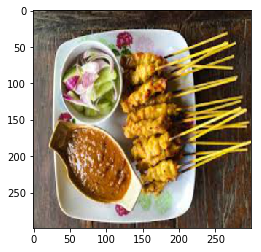

In [2]:
def show_image(data):
    fig, axes = plt.subplots(1, )
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.imshow(data)
    plt.show()
    
def load_image(filename):
    img = misc.imread(filename)
    img = misc.imresize(img, [299, 299], 'bilinear')
    return img

show_image(load_image('./data/satay.jpg'))

In [3]:
import csv

with open('./data/category_map.csv', mode='r') as f:
    reader = csv.reader(f)
    category_map = {row[0]:row[1] for row in reader}
    
print(category_map)

{'69': 'pot_wrap_meat', '127': 'chng_tng', '8': 'spicy_fish_soup', '13': 'stirfried_eggplant', '11': 'beef_noodles', '57': 'spicy_lobster', '117': 'onion_roll', '98': 'hokkien_prawn_noodles', '108': 'mashed_potato', '41': 'mixed_vegetables', '25': 'roast_chicken', '120': 'kang_kong', '111': 'bibimbap', '44': 'cuttlefish', '24': 'rice_dumpling', '64': 'steamed_fish', '73': 'spring_roll', '79': 'pancake', '10': 'spicy_meat', '91': 'garlic_white_meat', '81': 'string_bean_with_eggplant', '130': 'bean_curd_skin', '86': 'earth_three_fresh', '99': 'chinese_ramen', 'category': 'category_label', '115': 'lotus_root_soup', '39': 'spring_onion', '31': 'spicy_chicken', '58': 'fragrance_hot_pot', '124': 'green_bean_soup', '90': '', '87': 'pineapple_rice', '119': 'three_cup_chicken', '5': 'beef_brisket', '75': 'stinky_tofu', '26': 'chicken_wing', '54': 'sour_soup_fat_beef', '116': 'winter_melon_soup', '52': 'century_egg', '18': 'pork_ribs', '77': 'spicy_fish', '131': 'yu_sheng', '70': 'fish_soup', '1

In [21]:
def find_n_largest_values(list, n=5):
    arr = np.asarray(list)
    indices = np.argpartition(arr, -n)[-n:]
    indices = indices[np.argsort(arr[indices])]
    return indices.tolist()[::-1]

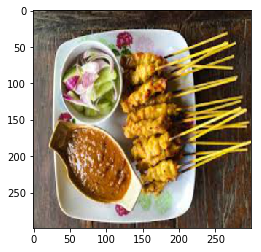

['small_fried_meat: 0.628299', 'vinegar_bok_choy: 0.262679', 'mapo_tofu: 0.0197661', 'scallion: 0.0190182', 'sour_spicy_noodles: 0.0168371']


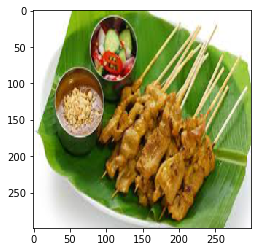

['vinegar_bok_choy: 0.998395', 'stuffed_chilli: 0.000578863', 'mapo_tofu: 0.000273109', 'sweet_corn: 0.000181929', 'spicy_cold_noodles: 7.37183e-05']


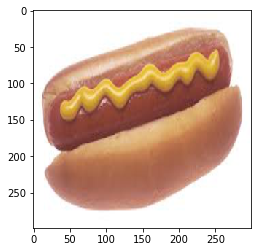

['garlic_pork_ribs: 0.81645', 'sushi_roll: 0.10147', 'kung_pow_chicken: 0.0500062', 'gluten: 0.0161162', 'stuffed_chilli: 0.00368035']


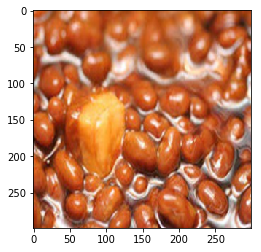

['baked_beans: 0.999915', 'fragrance_hot_pot: 5.4295e-05', 'kang_kong: 1.84571e-05', 'burdock_root: 5.15432e-06', 'beef_brisket: 3.74483e-06']


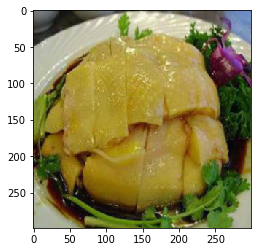

['siew_mai: 0.990897', 'pork_ribs: 0.00444295', 'green_bean_soup: 0.0021663', 'braised_tofu: 0.0010748', 'fish_soup: 0.000870471']


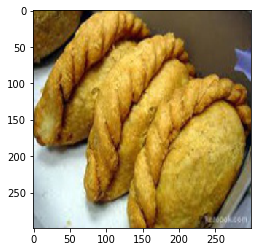

['burdock_root: 0.916349', 'sushi_roll: 0.0643872', 'mapo_tofu: 0.0103937', 'stuffed_chilli: 0.00289665', 'sour_spicy_noodles: 0.00151178']


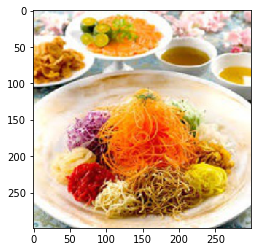

['meat_strip: 0.999944', 'sour_spicy_noodles: 2.76406e-05', 'tea_egg: 2.21969e-05', 'kang_kong: 2.71007e-06', 'bean_curd_skin: 1.98232e-06']


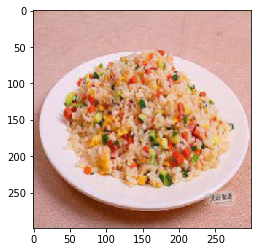

['spicy_frog: 0.994939', ': 0.00500052', 'beef_noodles: 8.09798e-06', 'winter_melon_soup: 6.41116e-06', 'xiao_long_bao: 5.37526e-06']


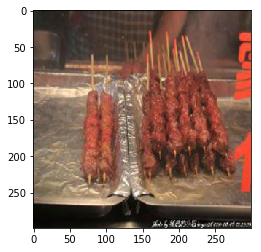

['vinegar_bok_choy: 0.940566', 'small_fried_meat: 0.0341314', 'sour_spicy_noodles: 0.0172061', 'sweet_sour_pork: 0.00512269', 'fried_rice: 0.000946442']


In [39]:
test_images = np.array([load_image('./data/satay.jpg'), \
                        load_image('./data/satay2.jpg'), \
                        load_image('./data/hotdog.jpg'), \
                        load_image('./data/train/0/1.jpg'), \
                        load_image('./data/train/9/3536.jpg'), \
                        load_image('./data/train/71/26322.jpg'), \
                        load_image('./data/validation/131/48862.jpg'), \
                        load_image('./data/validation/128/47410.jpg'), \
                        load_image('./data/validation/3/998.jpg')
                     ])

test_images = test_images/255.0

predictions = model.predict(test_images)

for predict_index, predicted_y in enumerate(predictions):
    indices = find_n_largest_values(predicted_y, 5)
    labels = [category_map[str(index)] + ": " +str(predicted_y[index]) for index in indices]
    show_image(test_images[predict_index])
    print(labels)